AUTHOUR: Ukachukwu Christian Chinweike<br>

TITLE: Movie recommendation system<br>

LANGUAGE: Python

INSTALL THE DEPENDENCIES REQUIRED FOR A GOOD CODING PRACTICE

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from ast import literal_eval

Reading and Storing Data

In [2]:
cre = pd.read_csv('tmdb_5000_credits.csv')
mov = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
#let us see what the credit data looks like.
cre.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
#let us check out how our Movie data look like as well
mov.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
#LET US JOIN TH TWO DATA SETS TO HELP US PULL OUT THE CAST FROM THE cre DATASET
# joining two datasets
#please notice the double t in tittle, it is so to prevent it from generating x and y in the system and disturbibg the dataframe
cre.columns=['id','tittle','cast','crew']
mov=mov.merge(cre,on='id')

FROM THE DATA PROVIDED ABOVE, EXPECIALLY IN THE mov DATA FRAME, RATING AND VOTING PLACES A MOVIE ON HIGH PEDESTALS, HENCE WE CONSIDER THE TWO DATA FIELDS AS PARAMETER FOR FILTERING

In [6]:
mean_mov= mov['vote_average'].mean()
mean_mov

6.092171559442011

In [7]:
uq_mov= mov['vote_count'].quantile(0.9)
uq_mov

1838.4000000000015

FROM THE ABOVE, YOU WILL NOTICE THAT GIVEN AMOUNT OF MOVIES MADE IT ABOVE THE NORMAL RATING. IN FACT, THEY ARE IN THE TOP 10% OF THE MOVIES VOTED BY AUDIENCE


NOW WE FILTER THE MOVIE DATASET IN SUCH A WAY THAT THE MOVIES IN THE TOP VOTE COUNTS QUALIFIED FOR THE STUDY; BESIDES WHO WOULDN'T WANT TO SEE INTERESTING MOVIES?

In [8]:
qual=mov.copy().loc[mov['vote_count']>=uq_mov]
qual.shape

(481, 23)

In [9]:
#let us take a peep at the qualified movies
qual.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


IMDb raton is a world class accepted rating for movies. The rating however is based on the average rating (1-10) and the vote count for any particular movie in question

The fomular is in form

(((vote count)/(vote count+ quantile(0.9) of vote count)* Average vote per movie) + ((vote count+ quantile(0.9) of vote count)/(vote count+ quantile(0.9) of vote count + vote count)* average rating)

from our Dataset we can give the formular as

**(v/(v+uq_mov)* R) + (uq_mov/(uq_mov+v)* mean_mov)

In [10]:
def weighted_rating(x,m=uq_mov,C=mean_mov):
    v=x['vote_count']
    R=x['vote_average']
    #calculation based on IMDB formula
    
    return (v /(v+m)* R) + (m/(m+v)*C)

Each movie has a special IMDb weighted rating from the formular implemented now, hence we create another field that will describe the scores of a movie and call it "Score"

In [11]:
qual['score']= qual.apply(weighted_rating,axis=1)

Now let us pull out the top 20 rated movies based on their IMD rating scores among the qualified movies

In [12]:
qual = qual.sort_values('score', ascending=False)

qual[['title', 'vote_count', 'vote_average', 'score']].head(20)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


HAVING GOTTEN THE FIRST PHASE, AT LEAST WE CAN RECOMMEND BASED ON RATING. BUT ALL THESE 481 MOVIES WON'T BE SEEN AS THE TRENDING U POPULAR MOVIES. HENCE, WE SORT THE MOVIE DATA FRAME BASED ON POPULARITY. WORKING WITH TOP 7 MOVIES

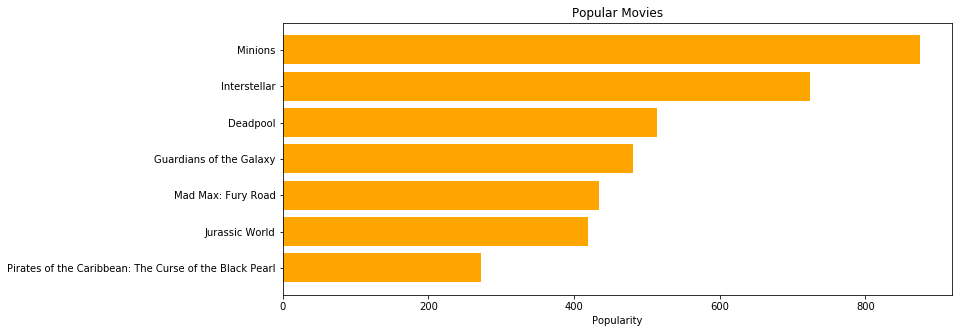

In [13]:
pop= mov.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,5))

plt.barh(pop['title'].head(7),pop['popularity'].head(7), align='center',
        color='orange')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show()

FROM THE ABOVE, WE CAN PLACE THE TOP SEVEN MOST POPULAR MOVIES NOW ON THE TOP OF THE SCREEN TO ENABLE THE USERS CHECK THEM OUT.

THE NEXT FILTERING IS BASED ON RELATIONSHIP BETWEEN THE CONTENT OF THE MOVIE. HERE, WE WILL DO A LITTLE OF NATURAL LANGUAGE PROCESSING.

In [14]:
#LETS SEE HOW THE MOVIE OVERVIEW IN MOVIE DATASET LOOKS LIKE
mov['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [15]:
#installing and configuring quick use dependencies
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(stop_words='english')

In [16]:
# Replace Nan with an empty string
mov['overview']=mov['overview'].fillna('')

# construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix= tfidf.fit_transform(mov['overview'])

tfidf_matrix.shape

(4803, 20978)

In [17]:
from sklearn.metrics.pairwise import linear_kernel

#compute the cosine similarity matrix
cosine_sim= linear_kernel(tfidf_matrix,tfidf_matrix)

 There is a need to use the movie title to control the recommendations no matter the parameters in check. so, we get a function taking movie title as an input and outputs a list of the 7 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. we should develop a pattern that will respond to the movies and pull out the movie's index in the source/master data according the imputs

In [18]:
# construct a reverse map of indices and movie titles
indices= pd.Series(mov.index, index=mov['title']).drop_duplicates()

In [19]:
# Function that takes in movie title & outputs similar movies
def rec_movie(title,cosine_sim=cosine_sim):
    # get the index of the movie that matches the title
    idx= indices[title]
    
    # get the pairwise similarity scores of all the movies with that movie
    sim_scores=list(enumerate(cosine_sim[idx]))
    
    #sort the movies based on similarity scores
    sim_scores= sorted(sim_scores,key=lambda x :x[1], reverse=True)
    
    # get the scors of the 7 most similar movies
    sim_scores=sim_scores[1:8]
    
    #get the movie indices
    movie_indices=[i[0] for i in sim_scores]
    
    # return the top 7 most similar movies
    return mov['title'].iloc[movie_indices]

LET US TEST THE ABOVE MODEL AND SEE HOW IT WORKS


In [20]:
rec_movie('Inception')

2897                                Cypher
134     Mission: Impossible - Rogue Nation
1930                            Stone Cold
914                   Central Intelligence
1683                       Pitch Perfect 2
1248                        At First Sight
1512                 A History of Violence
Name: title, dtype: object

TA DAAA! ANOTHER ONE!

In [21]:
rec_movie('The Shawshank Redemption')

4531               Civil Brand
3785                    Prison
609                Escape Plan
2868                  Fortress
4727              Penitentiary
1779    The 40 Year Old Virgin
2667          Fatal Attraction
Name: title, dtype: object

THERE WILL BE OTHER PARAMETERS FOR RECOMMENDING A MOVIE APART FROM RATING, VOTES AND CONTENTS. I WOULD LOVE TO WATCH EVERY MOVIE BY VIN DIESEL AND WILL SMITH NO MATTER HOW MUCH GENESIS CINEMA OR FILMHOUSE CHARGES FOR IT. HENCE, WE PREPARE A RECOMMENDATION MODEL BASED ON THE ACTORS AND CREW, EVEN THE GANRE(ACTION, COMEDY AND EPIC)

In [22]:
#HAVING MERGED IT, WE CAN NOW EXPLORE THE FILES EASILY
features=['cast','crew','keywords','genres']
for feature in features:
    mov[feature]= mov[feature].apply(literal_eval)

LET US SEE HOW THE MOVIE DIRECTOR MATTER

In [23]:
def mov_dir(x):
    for i in x:
        if i['job']=='Director':
            return i['name']
        return np.nan

In [24]:
# return the list top 3 elements or entire list ; whichever is more.
def get_list(x):
    if isinstance(x,list):
        names=[i['name'] for i in x]
        # check if more than 3 elements exists, If yes, return only first three. If no , return entire list
        if len(names)>3:
            names=names[:3]
            return names
        #return empty list in case of missing/malformed data
        return []

FROM THE TOP THREE KEYWORD, GET THE DIRECTOR PER MOVIE, AND PROVIDE "NAN", THAT IS, NULL WHERE THERE IS NO DIRECTOR


In [25]:
mov['director']=mov['crew'].apply(mov_dir)
features=['cast','keywords','genres']
for feature in features:
    mov[feature]=mov[feature].apply(get_list)

LET US SEE THE NEW DATA FRAME CONTAINING THE NEW FEATURES INTRODUCED

In [26]:
mov[['title','cast','director','keywords','genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",NaN,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",NaN,"[ocean, drug abuse, exotic island]",[]
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",NaN,"[spy, based on novel, secret agent]",[]


SINCE WE ARE USING KEYWORDS, LET US MAKE ALL ENTIRS AND ALL FUNCTION VALUES TO BE IN SMALL LETTERS(LOWER CASE) SO THAT WHEN THE USER SEARCHES WITH BOTH CAPITAL AND SMALL LETTERS, IT MIGHT PULL A MATCH. ALSO, LET US REMOVE PUNCTUATIONS AD SPACES TO ENHANCE PROPER MATCHING 

In [27]:
def cleandata(x):
    if isinstance(x,list):
        return[str.lower(i.replace(" ","")) for i in x]
    else:
        #check if director exists. If not, return empty string
        if isinstance(x,str):
            return str.lower(x.replace(" ",""))
        else:
            return ''

THE CODE BELOW APPLIES THE CLEANING FUNCTION BELOW INTO THE NEW FEATURE OF MOV DATA FRAME

In [28]:
features=['cast','keywords','director','genres']

for feature in features:
    mov[feature]=mov[feature].apply(cleandata)

Let us create a "soup" which string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords)

In [29]:
def makesoup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
mov['soup'] = mov.apply(makesoup, axis=1)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

count= CountVectorizer(stop_words='english')
count_matrix= count.fit_transform(mov['soup'])

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
cosine_sim2=cosine_similarity(count_matrix,count_matrix)

In [33]:
mov= mov.reset_index()
indices= pd.Series(mov.index, index=mov['title'])

In [34]:
rec_movie('Stolen',cosine_sim2)

1253                 Kiss of Death
747                 Gangster Squad
1503                        Takers
1986                        Faster
2154                  Street Kings
2277    The Baader Meinhof Complex
3553                 Dum Maaro Dum
Name: title, dtype: object

In [35]:
rec_movie('Takers',cosine_sim2)

747                 Gangster Squad
1470                        Stolen
1986                        Faster
2154                  Street Kings
2277    The Baader Meinhof Complex
3553                 Dum Maaro Dum
3966                   Point Blank
Name: title, dtype: object